# K Nearest Neighbor (KNN)

## KNN for classification

Our goal is to build a model to predict medvCategory based on 'rm', 'ptratio' and 'lstat'.

In [1]:
import pandas as pd 

### Step 1: Load and prep data

In [2]:
BostonData = pd.read_csv("Boston.csv")
BostonData.head(5)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
del BostonData['Unnamed: 0'] #Remove unwanted columns

In [4]:
BostonData.isnull().sum() #Check for null values

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [5]:
import numpy as np

#Create 4 groups to categorize medv 
BostonData['medvCategory'] = np.array(pd.qcut(BostonData['medv'], q = [0, .2, .5, .8, 1], labels = ['1','2','3','4']))
BostonData.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,medvCategory
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,3
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,3
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,4
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,4


### Step 2: Split the data into train, valid, and test

In [6]:
from sklearn.model_selection import train_test_split

#Define response and predictors in new variables
X = BostonData[['rm','ptratio','lstat']]
y = BostonData['medvCategory']

#Split the data into train, valid, and test set (60%-20%-20%)
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

#Next we split out 25% of the previous 80% which equals 20% of the original data 
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size = 0.25, random_state = 1)


### Step 3: Select the best K value w/ misclassification error

In [7]:
from sklearn.preprocessing import StandardScaler 
from sklearn import neighbors, metrics 

#First, we standardize our train and valid datasets based on the training set
scaler = StandardScaler() 
scaler.fit(X_train) #Fit the data with training set
X_train = pd.DataFrame(scaler.transform(X_train)) #Next, transform
X_valid = pd.DataFrame(scaler.transform(X_valid)) #Next, transform

In [8]:
#Second, create a loop to find the best K value by evaluating the misclassification error
valid_error = [] #Create a list to hold misclassification error

for k in range (1,30):
    knn = neighbors.KNeighborsClassifier(n_neighbors = k, weights = 'uniform')
    knn.fit(X_train, y_train) #Fit model with training data
    y_hat = knn.predict(X_valid) #Use the validation data to calculate predictions
    valid_error.append(np.mean(y_hat != y_valid)) #Calculate misclassification error of valid set

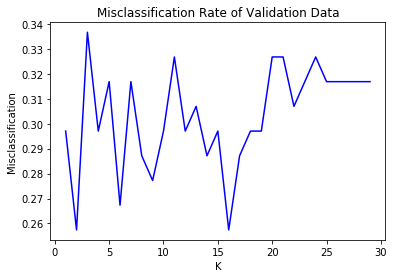

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

#Graph misclassification errors of validation set 
plt.plot(range(1,30),valid_error, color = 'blue')
plt.xlabel("K")
plt.ylabel("Misclassification")
plt.title ("Misclassification Rate of Validation Data")
plt.show()

In [10]:
bestK = np.argmin(valid_error)+1 #Find the position of the lowest misclass error (the best K value) 
print(bestK) #K value 
print(min(valid_error)) #Misclassification error 

2
0.25742574257425743


The best K value is 2 with a missclassification rate of 25.74%

### Step 4: Train model with best K and report misclassification rate of the test set

In [11]:
# Restandardize the data
scaler.fit(X_train_valid) #Fit data with combined dataset
X_train_valid = pd.DataFrame(scaler.transform(X_train_valid)) #Transform 
X_test = pd.DataFrame(scaler.transform(X_test)) #Transform

In [12]:
#Run KNN model with best K value 
knn2 = neighbors.KNeighborsClassifier(n_neighbors = bestK, weights = "uniform") # Use best K
knn2.fit(X_train_valid, y_train_valid) #Fit model with training and validation data
yhat = knn2.predict(X_test) #Use the test data to calculate predictions 
np.mean(yhat!= y_test) #Calculate misclassification rate of test data

0.27450980392156865

Our classification model has a misclassification rate of 27.45%. 

### Step 5: Use model to make a prediction

What is the class of a neighborhood with rm = 2, lstat = 3.5 and ptratio = 19?

In [13]:
predict = pd.DataFrame([[2,3.5,19]])
predict = scaler.transform(predict)
knn2.predict(predict)

array(['1'], dtype=object)

The model predicts Class 1 !

## KNN for regression

Our goal is to build a model to predict medv based on all the variables.

### Step 1: Set up data

In [14]:
X = BostonData.copy()
del X['medv']
del X['medvCategory']
y = BostonData['medv']

### Step 2: Split the data into train, valid, and test

In [15]:
#Split the data into train, valid, and test set (60%-20%-20%)
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

#Next we split out 25% of the previous 80% which equals 20% of the original data
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size = 0.25, random_state = 1)


### Step 3: Select the best K value w/ MSE

In [16]:
from sklearn import metrics

#First, we standardize our train and valid datasets based on the training set
scaler = StandardScaler() 
scaler.fit(X_train) #Fit the data with training set
X_train = pd.DataFrame(scaler.transform(X_train)) #Next, transform
X_valid = pd.DataFrame(scaler.transform(X_valid)) #Next, transform


In [17]:
#Second, create a loop to find the best K value by evaluating the MSE
valid_mse = [] #Create a list to hold misclassification error

for k in range (1,30):
    knn3 = neighbors.KNeighborsRegressor(n_neighbors = k, weights = 'uniform')
    knn3.fit(X_train, y_train) #Fit model with training data
    y_hat = knn3.predict(X_valid) #Use the validation data to calculate predictions
    valid_mse.append(metrics.mean_squared_error (y_hat, y_valid)) #Calculate MSE of valid set

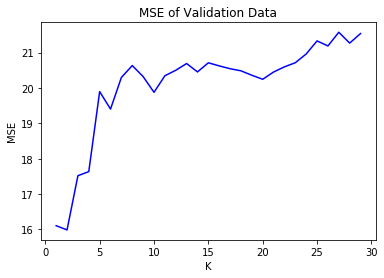

In [18]:
#Graph misclassification errors of validation set 
plt.plot(range(1,30),valid_mse, color = 'blue')
plt.xlabel("K")
plt.ylabel("MSE")
plt.title ("MSE of Validation Data")
plt.show()

In [19]:
bestK2 = np.argmin(valid_mse)+1 #Find the position of the lowest misclass error (the best K value) 
print(bestK2) #K value 
print(min(valid_mse)) #MSE

2
15.985198019801977


The best K value is 2 with a MSE of 15.98.

### Step 4: Train model with best K and report MSE of the test set

In [20]:
# Restandardize the data
scaler.fit(X_train_valid) #Fit data with combined dataset
X_train_valid = pd.DataFrame(scaler.transform(X_train_valid)) #Transform 
X_test = pd.DataFrame(scaler.transform(X_test)) #Transform

In [21]:
knn4 = neighbors.KNeighborsRegressor(n_neighbors = bestK2, weights = 'uniform')
knn4.fit(X_train_valid, y_train_valid) #Fit model with training data
y_hat = knn4.predict(X_test) #Use the validation data to calculate predictions
metrics.mean_squared_error (y_hat, y_test) #Calculate MSE of valid set

12.872573529411762

Our regression model has a MSE of 12.87. 